In [1]:
import pandas as pd
import os
import random

In [2]:
idle_directory = "../data/combined data files/idle/benchmark data runs/"
attack_directory = "../data/combined data files/spectre/benchmark data runs/"

idle = "1. idle/"
cpu = "2. cpu/"
memory = "3. memory"
cpu_memory = "4. cpu + memory/"

idle_mode_idle_files = [file for file in os.listdir(idle_directory+idle)]
idle_mode_attack_files = [file for file in os.listdir(attack_directory+idle)]

cpu_mode_idle_files = [file for file in os.listdir(idle_directory+cpu)]
cpu_mode_attack_files = [file for file in os.listdir(attack_directory+cpu)]

memory_mode_idle_files = [file for file in os.listdir(idle_directory+memory)]
memory_mode_attack_files = [file for file in os.listdir(attack_directory+memory)]

cpu_memory_mode_idle_files = [file for file in os.listdir(idle_directory+cpu_memory)]
cpu_memory_mode_attack_files = [file for file in os.listdir(attack_directory+cpu_memory)]

In [3]:
executed_branch_mispredictions = "Executed Branch Mispredictions"
executed_branch_instructions = "Executed Branch Instructions"
executed_branch_misprediction_rate = "Executed Branch Misprediction Rate"

retired_branch_mispredictions = "Retired Branch Mispredictions"
retired_branch_instructions = "Retired Branch Instructions"
retired_branch_misprediction_rate = "Retired Branch Misprediction Rate"

executed_conditional_branch_mispredictions = "Executed Conditional Branch Mispredictions"
executed_conditional_branches = "Executed Conditional Branches"
executed_conditional_misprediction_rate = "Executed Conditional Misprediction Rate"

retired_near_taken_mispredictions = "Retired Near-Taken Branch Mispredictions"
retired_conditional_branches = "Retired Conditional Branches"
retired_near_taken_misprediction_rate = "Retired Near-Taken to Conditional misprediction Rate"

# Variables provided by you for L1, L2, and L3 cache metrics
L1_data_load_misses = "L1 Data Cache Load Misses"
L1_data_load_all = "L1 Data Cache Loads"
L1_data_load_miss_rate = "L1 Data Cache Load Miss Rate"

L2_demand_data_read_hits = "L2 Demand Data Read Hits"
L2_demand_data_read_all = "L2 All Demand Data Reads"
L2_demand_data_read_hit_rate = "L2 Demand Data Read Hit Ratio"

L3_demand_data_read_misses = "Offcore Demand Data Reads LLC Miss to DRAM"
L3_demand_data_read_hits = "Offcore Demand Data Reads LLC Hit Any Response"
L3_demand_data_read_miss_rate = "Offcore Demand Data Reads LLC Miss Rate"

L3_all_data_read_all = "Offcore All Data Reads LLC Any Response"
L3_all_data_read_misses = "Offcore All Data Reads LLC Miss to DRAM"
L3_all_data_read_miss_rate = "Offcore All Data Reads LLC miss rate"


branch_misses = "Branch Misses"
branch_instructions = "Branch Instructions"
branch_miss_rate = "Branch Miss Rate"

cache_misses = "Cache Misses"
cache_references = "Cache References"
cache_miss_rate = "Cache Miss Rate"

# additional rates
retired_to_executed_branch_rate = "Retired To Executed Branch Rate"
retired_to_executed_branch_misprediction_rate = "Retired to Executed Branch Misprediction Rate"

rate_pairs = [
    (L1_data_load_misses, L1_data_load_all, L1_data_load_miss_rate),
    (L2_demand_data_read_hits, L2_demand_data_read_all, L2_demand_data_read_hit_rate),
    (L3_all_data_read_misses, L3_all_data_read_all, L3_all_data_read_miss_rate),
    (executed_branch_mispredictions, executed_branch_instructions, executed_branch_misprediction_rate),
    (retired_branch_mispredictions, retired_branch_instructions, retired_branch_misprediction_rate),
    (executed_conditional_branch_mispredictions, executed_conditional_branches, executed_conditional_misprediction_rate),
    (retired_near_taken_mispredictions, retired_conditional_branches, retired_near_taken_misprediction_rate),
    (retired_branch_instructions, executed_branch_instructions, retired_to_executed_branch_rate),
    (retired_branch_mispredictions,executed_branch_mispredictions,retired_to_executed_branch_misprediction_rate),
    (branch_misses, branch_instructions, branch_miss_rate),
    (cache_misses, cache_references, cache_miss_rate),
]

def get_rate(df):
    """
    Compute logical rates from the given DataFrame based on predefined rate pairs.
    Returns a DataFrame with computed rates capped at 1 and infinities replaced with NaN.
    """
    rates_data = {}
    for numerator, denominator, rate_name in rate_pairs:
        rate = df[numerator] / df[denominator]
        rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
        rate = rate.clip(upper=1)  # Cap the rate at 1
        rate.fillna(0, inplace=True)
        rates_data[rate_name] = rate
    
    rate = df[L3_demand_data_read_misses] / df[L3_demand_data_read_misses]+df[L3_demand_data_read_hits]
    rate = df[numerator] / df[denominator]
    rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
    rate.fillna(0, inplace=True)
    rate = rate.clip(upper=1)  # Cap the rate at 1
    rates_data[L3_demand_data_read_miss_rate] = rate
    
    return pd.DataFrame(rates_data)


In [4]:
# Function to load all CSV files except the first one
def load_csv_files(directory):
    files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    return {f"df_{index}": pd.read_csv(os.path.join(directory, file)) for index, file in enumerate(files[0:], start=0)}

# Load dataframes for each mode
idle_mode_idle_dataframes = load_csv_files(idle_directory + idle)
idle_mode_attack_dataframes = load_csv_files(attack_directory + idle)

cpu_mode_idle_dataframes = load_csv_files(idle_directory + cpu)
cpu_mode_attack_dataframes = load_csv_files(attack_directory + cpu)

memory_mode_idle_dataframes = load_csv_files(idle_directory + memory)
memory_mode_attack_dataframes = load_csv_files(attack_directory + memory)

cpu_memory_mode_idle_dataframes = load_csv_files(idle_directory + cpu_memory)
cpu_memory_mode_attack_dataframes = load_csv_files(attack_directory + cpu_memory)

# Display loaded dataframes
def display_dataframes_info(mode_name, dataframes):
    print(f"\n{mode_name} DataFrames:")
    for name, df in dataframes.items():
        print(f"{name}: {df.shape}")

# Display DataFrame information for all modes
display_dataframes_info("Idle Mode Idle", idle_mode_idle_dataframes)
display_dataframes_info("Idle Mode Attack", idle_mode_attack_dataframes)
display_dataframes_info("CPU Mode Idle", cpu_mode_idle_dataframes)
display_dataframes_info("CPU Mode Attack", cpu_mode_attack_dataframes)
display_dataframes_info("Memory Mode Idle", memory_mode_idle_dataframes)
display_dataframes_info("Memory Mode Attack", memory_mode_attack_dataframes)
display_dataframes_info("CPU + Memory Mode Idle", cpu_memory_mode_idle_dataframes)
display_dataframes_info("CPU + Memory Mode Attack", cpu_memory_mode_attack_dataframes)


Idle Mode Idle DataFrames:
df_0: (3003, 21)
df_1: (3002, 21)
df_2: (3003, 21)
df_3: (3003, 21)
df_4: (3003, 21)

Idle Mode Attack DataFrames:
df_0: (3349, 21)
df_1: (2383, 21)
df_2: (2767, 21)
df_3: (2736, 21)
df_4: (2985, 21)

CPU Mode Idle DataFrames:
df_0: (3005, 21)
df_1: (3006, 21)
df_2: (3005, 21)
df_3: (3007, 21)
df_4: (3005, 21)

CPU Mode Attack DataFrames:
df_0: (3112, 21)
df_1: (3515, 21)
df_2: (2968, 21)
df_3: (2938, 21)
df_4: (3502, 21)

Memory Mode Idle DataFrames:
df_0: (3015, 21)
df_1: (2412, 21)
df_2: (2407, 21)
df_3: (2411, 21)
df_4: (2414, 21)

Memory Mode Attack DataFrames:
df_0: (2060, 21)
df_1: (2628, 21)
df_2: (2190, 21)
df_3: (2325, 21)
df_4: (2347, 21)

CPU + Memory Mode Idle DataFrames:
df_0: (2410, 21)
df_1: (2405, 21)
df_2: (2410, 21)
df_3: (2405, 21)
df_4: (2406, 21)

CPU + Memory Mode Attack DataFrames:
df_0: (3291, 21)
df_1: (2787, 21)
df_2: (4972, 21)
df_3: (4014, 21)
df_4: (2981, 21)


In [5]:
# Process and assign rate DataFrames to individual variables
rate_idle_mode_idle_dataframes = {
    name: get_rate(df).iloc[:750] for name, df in idle_mode_idle_dataframes.items()
}

rate_idle_mode_attack_dataframes = {
    name: get_rate(df).iloc[:750] for name, df in idle_mode_attack_dataframes.items()
}

rate_cpu_mode_idle_dataframes = {
    name: get_rate(df).iloc[:750] for name, df in cpu_mode_idle_dataframes.items()
}

rate_cpu_mode_attack_dataframes = {
    name: get_rate(df).iloc[:750] for name, df in cpu_mode_attack_dataframes.items()
}

rate_memory_mode_idle_dataframes = {
    name: get_rate(df).iloc[:750] for name, df in memory_mode_idle_dataframes.items()
}

rate_memory_mode_attack_dataframes = {
    name: get_rate(df).iloc[:750] for name, df in memory_mode_attack_dataframes.items()
}

rate_cpu_memory_mode_idle_dataframes = {
    name: get_rate(df).iloc[:750] for name, df in cpu_memory_mode_idle_dataframes.items()
}

rate_cpu_memory_mode_attack_dataframes = {
    name: get_rate(df).iloc[:750] for name, df in cpu_memory_mode_attack_dataframes.items()
}

# Display the processed DataFrame information
print("Rate Idle Mode Idle DataFrames:")
for name, df in rate_idle_mode_idle_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate Idle Mode Attack DataFrames:")
for name, df in rate_idle_mode_attack_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate CPU Mode Idle DataFrames:")
for name, df in rate_cpu_mode_idle_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate CPU Mode Attack DataFrames:")
for name, df in rate_cpu_mode_attack_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate Memory Mode Idle DataFrames:")
for name, df in rate_memory_mode_idle_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate Memory Mode Attack DataFrames:")
for name, df in rate_memory_mode_attack_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate CPU + Memory Mode Idle DataFrames:")
for name, df in rate_cpu_memory_mode_idle_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate CPU + Memory Mode Attack DataFrames:")
for name, df in rate_cpu_memory_mode_attack_dataframes.items():
    print(f"{name}: {df.shape}")


Rate Idle Mode Idle DataFrames:
df_0: (750, 12)
df_1: (750, 12)
df_2: (750, 12)
df_3: (750, 12)
df_4: (750, 12)

Rate Idle Mode Attack DataFrames:
df_0: (750, 12)
df_1: (750, 12)
df_2: (750, 12)
df_3: (750, 12)
df_4: (750, 12)

Rate CPU Mode Idle DataFrames:
df_0: (750, 12)
df_1: (750, 12)
df_2: (750, 12)
df_3: (750, 12)
df_4: (750, 12)

Rate CPU Mode Attack DataFrames:
df_0: (750, 12)
df_1: (750, 12)
df_2: (750, 12)
df_3: (750, 12)
df_4: (750, 12)

Rate Memory Mode Idle DataFrames:
df_0: (750, 12)
df_1: (750, 12)
df_2: (750, 12)
df_3: (750, 12)
df_4: (750, 12)

Rate Memory Mode Attack DataFrames:
df_0: (750, 12)
df_1: (750, 12)
df_2: (750, 12)
df_3: (750, 12)
df_4: (750, 12)

Rate CPU + Memory Mode Idle DataFrames:
df_0: (750, 12)
df_1: (750, 12)
df_2: (750, 12)
df_3: (750, 12)
df_4: (750, 12)

Rate CPU + Memory Mode Attack DataFrames:
df_0: (750, 12)
df_1: (750, 12)
df_2: (750, 12)
df_3: (750, 12)
df_4: (750, 12)


In [6]:
def compute_average_from_dict(df_dict):
    combined = sum(df_dict.values()) / len(df_dict)
    return combined

avg_idle_idle = compute_average_from_dict(rate_idle_mode_idle_dataframes)
avg_idle_attack = compute_average_from_dict(rate_idle_mode_attack_dataframes)
avg_cpu_idle = compute_average_from_dict(rate_cpu_mode_idle_dataframes)
avg_cpu_attack = compute_average_from_dict(rate_cpu_mode_attack_dataframes)
avg_memory_idle = compute_average_from_dict(rate_memory_mode_idle_dataframes)
avg_memory_attack = compute_average_from_dict(rate_memory_mode_attack_dataframes)
avg_combined_idle = compute_average_from_dict(rate_cpu_memory_mode_idle_dataframes)
avg_combined_attack = compute_average_from_dict(rate_cpu_memory_mode_attack_dataframes)

avg_idle_idle.columns

Index(['L1 Data Cache Load Miss Rate', 'L2 Demand Data Read Hit Ratio',
       'Offcore All Data Reads LLC miss rate',
       'Executed Branch Misprediction Rate',
       'Retired Branch Misprediction Rate',
       'Executed Conditional Misprediction Rate',
       'Retired Near-Taken to Conditional misprediction Rate',
       'Retired To Executed Branch Rate',
       'Retired to Executed Branch Misprediction Rate', 'Branch Miss Rate',
       'Cache Miss Rate', 'Offcore Demand Data Reads LLC Miss Rate'],
      dtype='object')

In [7]:
idle_data = [avg_idle_idle,avg_cpu_idle,avg_memory_idle,avg_combined_idle]
attack_data = [avg_idle_attack,avg_cpu_attack,avg_memory_attack,avg_combined_attack]

def format_label(label, max_words=2):
    words = label.split(" ")
    return "\n".join([" ".join(words[i:i+max_words]) for i in range(0, len(words), max_words)])


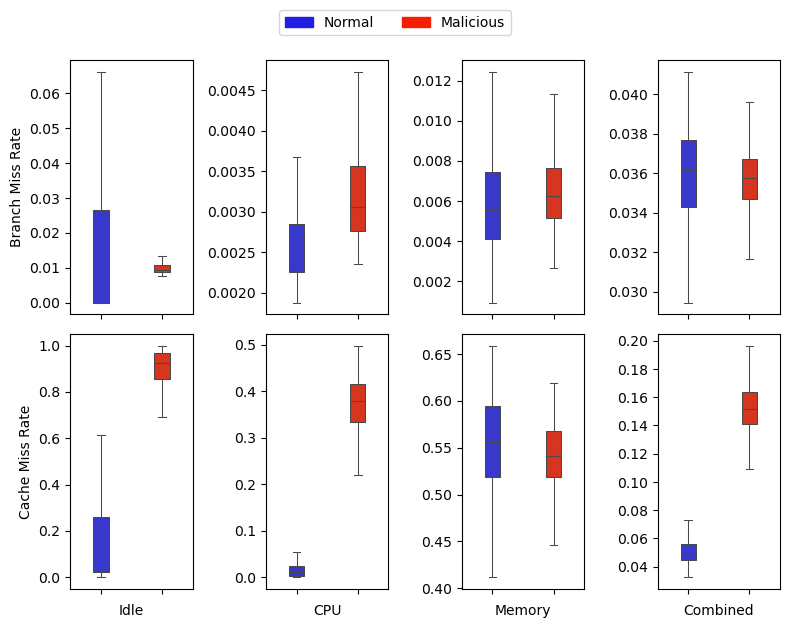

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches  # Import Patch for manual legend

# Parameters
figsize = (8, 6)  # Adjusted for transposed layout
box_palette = ["#2020E2", "#F51E00"]  # Blue for Normal, Red for Malicious

columns = [
    'Branch Miss Rate',
    'Cache Miss Rate'
]
rows = ["Idle", "CPU", "Memory", "Combined"]
col_names = [
    'Branch Miss Rate',
    'Cache Miss Rate'
]
# Initialize transposed subplots
fig, axs = plt.subplots(len(columns), 4, sharex=True, sharey=False, figsize=figsize)

# Loop through rows (metrics) and columns (modes)
for i, col in enumerate(columns):
    for x in range(len(idle_data)):
        ax = axs[i, x]  # Transposed layout (metric first, then mode)
        
        # Create a DataFrame for Normal and Malicious data
        rate_df = pd.DataFrame({
            "Normal": idle_data[x][col],  # Use column name directly
            "Malicious": attack_data[x][col]
        })

        # Plot boxplot with consistent colors for lines and boxes
        sns.boxplot(
            data=rate_df,
            ax=ax,
            palette=box_palette,
            showfliers=False,
            linewidth=0.75,  # Adjust thickness of the boxplot lines
            width = .25,
        )

        ax.set_xticklabels([])  # Remove x-tick labels
        # Set x-axis labels for the bottom row
        if i == len(columns) - 1:  # Last row
            ax.set_xlabel(rows[x], fontsize=10)
        else:
            ax.set_xlabel("")
        
        # Set y-axis labels for the first column
        if x == 0:  # First column
            ax.set_ylabel(col_names[i], fontsize=10,rotation=90)
        else:
            ax.set_ylabel("")

# **Manually Create a Legend**
normal_patch = mpatches.Patch(color=box_palette[0], label="Normal")
malicious_patch = mpatches.Patch(color=box_palette[1], label="Malicious")

# Add legend to figure
fig.legend(handles=[normal_patch, malicious_patch], loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Avoid overlap with legend
plt.show()
fig.savefig("../images/paper/modes.png",dpi=300)